In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [9]:
dataset = pd.read_csv("SuTüketimi.csv")

In [10]:
dataset.head(10)

,İlçe,2019,2018,2017,2016,2015,Nüfus
0,ADALAR,1371291,1399182,1366581,1472276,1432494,16372
1,ARNAVUTKÖY,13818204,11404878,1017632,9178953,8002123,312023
2,ATAŞEHİR,22428468,21496185,21205911,19974097,18597049,427217
3,AVCILAR,19485453,18312736,17558403,17052253,16220476,457981
4,BÇEKMECE,13606571,12222470,11172787,10788924,9915435,269160
5,BAHÇELİEVLER,27841515,26167510,24868593,24320533,23610609,605300
6,BAKIRKÖY,15774446,15846543,12509301,11793169,11510117,228759
7,BAYRAMPAŞA,13630782,13226158,12516185,11914393,11545682,274884
8,BAĞCILAR,32393615,31241616,29362186,28182511,26691720,744351
9,BAŞAKŞEHİR,25124137,21789720,19576095,18100255,16174934,503243


In [11]:
X=dataset.iloc[:,[1,2,3,4]].values

In [12]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=200, n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\BabaYaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


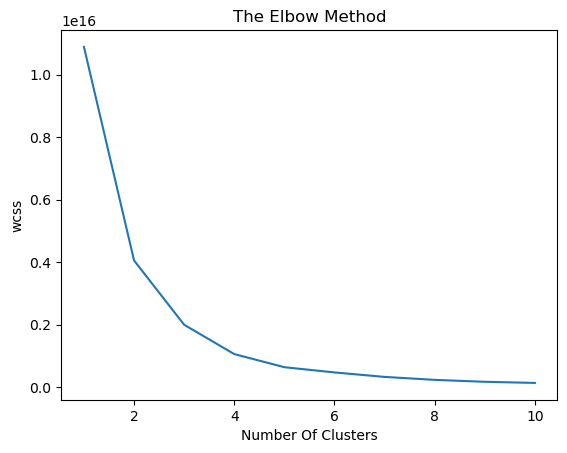

In [13]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("wcss")
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=200, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 1, 3, 3, 1, 0, 1, 1, 2, 3, 1, 3, 1, 1, 3, 2, 3, 0, 3, 1, 2, 0,
       3, 3, 0, 2, 3, 3, 1, 3, 1, 1, 1, 4, 1, 2, 0, 4, 3])

In [15]:
dataset["Cluter"] = y_kmeans
dataset

,İlçe,2019,2018,2017,2016,2015,Nüfus,Cluter
0,ADALAR,1371291,1399182,1366581,1472276,1432494,16372,4
1,ARNAVUTKÖY,13818204,11404878,1017632,9178953,8002123,312023,1
2,ATAŞEHİR,22428468,21496185,21205911,19974097,18597049,427217,3
3,AVCILAR,19485453,18312736,17558403,17052253,16220476,457981,3
4,BÇEKMECE,13606571,12222470,11172787,10788924,9915435,269160,1
5,BAHÇELİEVLER,27841515,26167510,24868593,24320533,23610609,605300,0
6,BAKIRKÖY,15774446,15846543,12509301,11793169,11510117,228759,1
7,BAYRAMPAŞA,13630782,13226158,12516185,11914393,11545682,274884,1
8,BAĞCILAR,32393615,31241616,29362186,28182511,26691720,744351,2
9,BAŞAKŞEHİR,25124137,21789720,19576095,18100255,16174934,503243,3


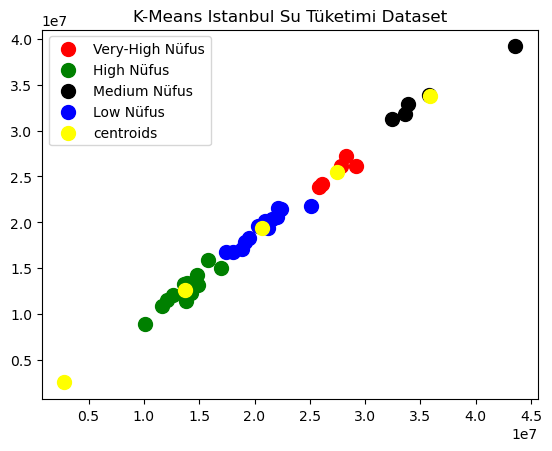

In [16]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c="red",label="Very-High Nüfus")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c="green",label="High Nüfus")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c="black",label="Medium Nüfus")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c="blue",label="Low Nüfus")


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c="yellow",label="centroids")
plt.title("K-Means Istanbul Su Tüketimi Dataset")


plt.legend()